In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# 0. Get Raw Data
# use app/services/data_fetcher.py to download raw dataset
# this can be replaced with some live data stream for product dev

In [2]:
# 1. Load Data
ticker_names = {
    "AAPL": "Apple Inc.",
    "MSFT": "Microsoft Corporation",
    "AMZN": "Amazon.com, Inc.",
    "SHOP": "Shopify Inc.",
    "JPM": "JPMorgan Chase & Co.",
    "BAC": "Bank of America Corporation",
    "XOM": "Exxon Mobil Corporation",
    "CVX": "Chevron Corporation",
    "JNJ": "Johnson & Johnson",
    "PFE": "Pfizer Inc.",
    "NEM": "Newmont Corporation",
    "WPM": "Wheaton Precious Metals Corp.",
    "BHP": "BHP Group Limited",
    "BA": "The Boeing Company",
    "LMT": "Lockheed Martin Corporation",
    "TSLA": "Tesla, Inc.",
    "F": "Ford Motor Company",
    "GLD": "SPDR Gold Trust",
    "SLV": "iShares Silver Trust",
    "BTC-USD": "Bitcoin",
    "ETH-USD": "Ethereum",
    "SOL-USD": "Solana",
    "BNB-USD": "Binance Coin",
    "ADA-USD": "Cardano"
}
# Define categories for the tickers
category_map = {
    'Technology': ['AAPL', 'MSFT', 'AMZN', 'SHOP', 'TSLA'],
    'Finance': ['JPM', 'BAC', 'BTC-USD', 'ETH-USD', 'SOL-USD', 'BNB-USD', 'ADA-USD'],
    'Energy': ['XOM', 'CVX'],
    'Healthcare': ['JNJ', 'PFE'],
    'Metals & Mining': ['NEM', 'WPM', 'BHP', 'GLD', 'SLV'],
    'Transportation & Defense': ['BA', 'LMT', 'F']
}
# for now we have fixed list of dataset available
period = "5y"
interval = "1d"
fin_dict = {ticker: pd.read_csv(f"../data/raw/{ticker}_{period}_{interval}.csv") for ticker in ticker_names.keys()}

In [4]:
fin_dict['AAPL'].describe()

,Open,High,Low,Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,160.215816,161.981637,158.568411,160.361130,8.330569e+07
std,40.878901,41.150340,40.650089,40.937269,4.333724e+07
min,60.888174,63.851283,60.519304,62.958221,2.323470e+07
25%,132.431971,133.565039,130.653827,131.955780,5.347790e+07
50%,157.709536,160.055152,155.649063,157.517670,7.243380e+07
75%,184.140520,185.456551,182.524132,184.170380,9.896450e+07
max,257.906429,259.814335,257.347047,258.735504,3.743368e+08


In [ ]:
# 2. Preprocessing (example for AAPL)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
prices = scaler.fit_transform(dataframes["AAPL"][["Close"]])


In [ ]:
# 3. Train LSTM (using torch.nn.LSTM)

In [ ]:
# 4. Train GRU


In [15]:
# 5. Clustering (across stocks)
close_prices = pd.DataFrame({
    ticker: df['Close']
    for ticker, df in fin_dict.items()
})
close_prices = close_prices.dropna()
returns = close_prices.pct_change().dropna()

In [23]:
returns.columns = ticker_names.values()
returns.isnull().sum()


Apple Inc.                       0
Microsoft Corporation            0
Amazon.com, Inc.                 0
Shopify Inc.                     0
JPMorgan Chase & Co.             0
Bank of America Corporation      0
Exxon Mobil Corporation          0
Chevron Corporation              0
Johnson & Johnson                0
Pfizer Inc.                      0
Newmont Corporation              0
Wheaton Precious Metals Corp.    0
BHP Group Limited                0
The Boeing Company               0
Lockheed Martin Corporation      0
Tesla, Inc.                      0
Ford Motor Company               0
SPDR Gold Trust                  0
iShares Silver Trust             0
Bitcoin                          0
Ethereum                         0
Solana                           0
Binance Coin                     0
Cardano                          0
dtype: int64

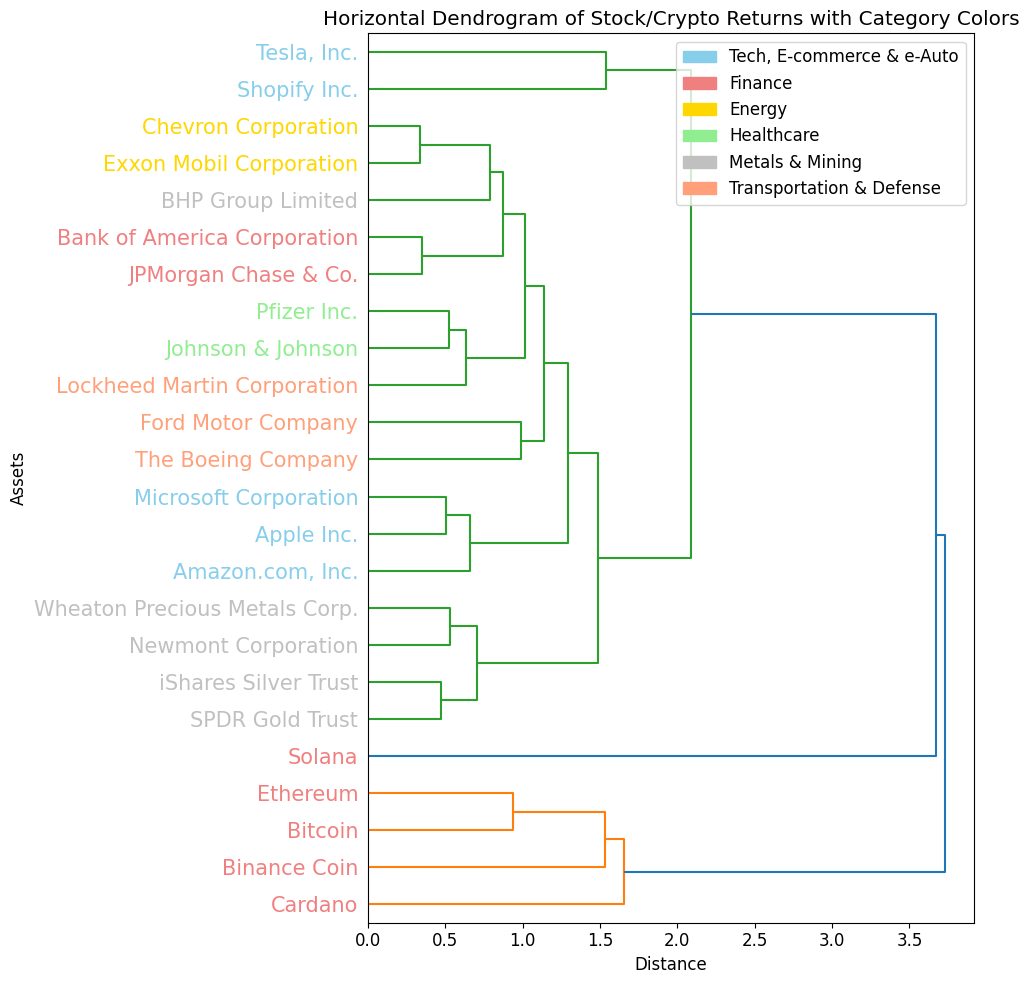

In [66]:
# Define categories for the tickers
category_map = {
    'Tech, E-commerce & e-Auto': ['AAPL', 'MSFT', 'AMZN', 'SHOP', 'TSLA'],
    'Finance': ['JPM', 'BAC', 'BTC-USD', 'ETH-USD', 'SOL-USD', 'BNB-USD', 'ADA-USD'],
    'Energy': ['XOM', 'CVX'],
    'Healthcare': ['JNJ', 'PFE'],
    'Metals & Mining': ['NEM', 'WPM', 'BHP', 'GLD', 'SLV'],
    'Transportation & Defense': ['BA', 'LMT', 'F']
}

# Create a color map for the categories
category_colors = {
    'Tech, E-commerce & e-Auto': 'skyblue',
    'Finance': 'lightcoral',
    'Energy': 'gold',
    'Healthcare': 'lightgreen',
    'Metals & Mining': 'silver',
    'Transportation & Defense': 'lightsalmon'
}
reversed_tickers = {value: key for key, value in ticker_names.items()}
# Create a dictionary to map labels to their colors
label_colors = {}
for label in returns.columns:
    for category, tickers in category_map.items():
        if reversed_tickers[label] in tickers:
            label_colors[label] = category_colors[category]
            break

# 6. Plot Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(returns.T, method='ward')

plt.figure(figsize=(10,10))
dendrogram(Z, labels=returns.columns, orientation='right', leaf_font_size=15)

# Get the current axes
ax = plt.gca()

# Get the y-axis tick labels (which are the leaf labels)
y_tick_labels = ax.get_yticklabels()

# Iterate through the labels and set their colors
for label in y_tick_labels:
    text = label.get_text()
    if text in label_colors:
        label.set_color(label_colors[text])

plt.title('Horizontal Dendrogram of Stock/Crypto Returns with Category Colors')
plt.xlabel('Distance')
plt.ylabel('Assets')
plt.tight_layout()

# Create legend handles and labels
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in category_colors.values()]
legend_labels = list(category_colors.keys())

# Add the legend to the top right
plt.legend(legend_handles, legend_labels, loc='upper right', fontsize='medium')

plt.show()

# Conclusion:
<em>Stocks dance together, metals stick close, crypto goes wild — the market's social network, visualized.</em>
* **Tech giants** like Apple, Microsoft, and Amazon cluster tightly together, reflecting their synchronized market movements and mutual dependency on global tech trends.

* **Banks and finance titans** like JPMorgan Chase and Bank of America show strong alignment, reacting similarly to economic cycles and interest rate changes.

* **Metals and mining assets** (Gold, Silver, Wheaton, Newmont) naturally form a cohesive cluster — the classic safe-haven assets that move in tandem during times of market stress.

* **Cryptocurrencies** like Bitcoin, Ethereum, Solana, and Cardano create their own rebellious group — wildly distinct from traditional markets, operating on their own risk universe.

* **Energy titans** Chevron and ExxonMobil also group logically, driven by oil prices and global energy demand.

* **Healthcare and defense stocks** hold their unique positions, less correlated to the broader swings seen elsewhere.

In [46]:
# 7. Risk-Return Scatter
mean_returns = returns.mean()
volatility = returns.std()
print("means: \n")
print(mean_returns.sort_values())

print("\n\nVolatility: \n")
print(volatility.sort_values())

means: 

Pfizer Inc.                      0.000021
Johnson & Johnson                0.000242
Newmont Corporation              0.000271
The Boeing Company               0.000301
Lockheed Martin Corporation      0.000336
BHP Group Limited                0.000486
SPDR Gold Trust                  0.000504
Bank of America Corporation      0.000670
Amazon.com, Inc.                 0.000676
iShares Silver Trust             0.000712
Microsoft Corporation            0.000797
Chevron Corporation              0.000801
JPMorgan Chase & Co.             0.000945
Wheaton Precious Metals Corp.    0.000994
Apple Inc.                       0.001030
Ford Motor Company               0.001128
Exxon Mobil Corporation          0.001138
Shopify Inc.                     0.001373
Bitcoin                          0.001599
Tesla, Inc.                      0.002351
Ethereum                         0.002792
Cardano                          0.002973
Binance Coin                     0.003338
Solana                   

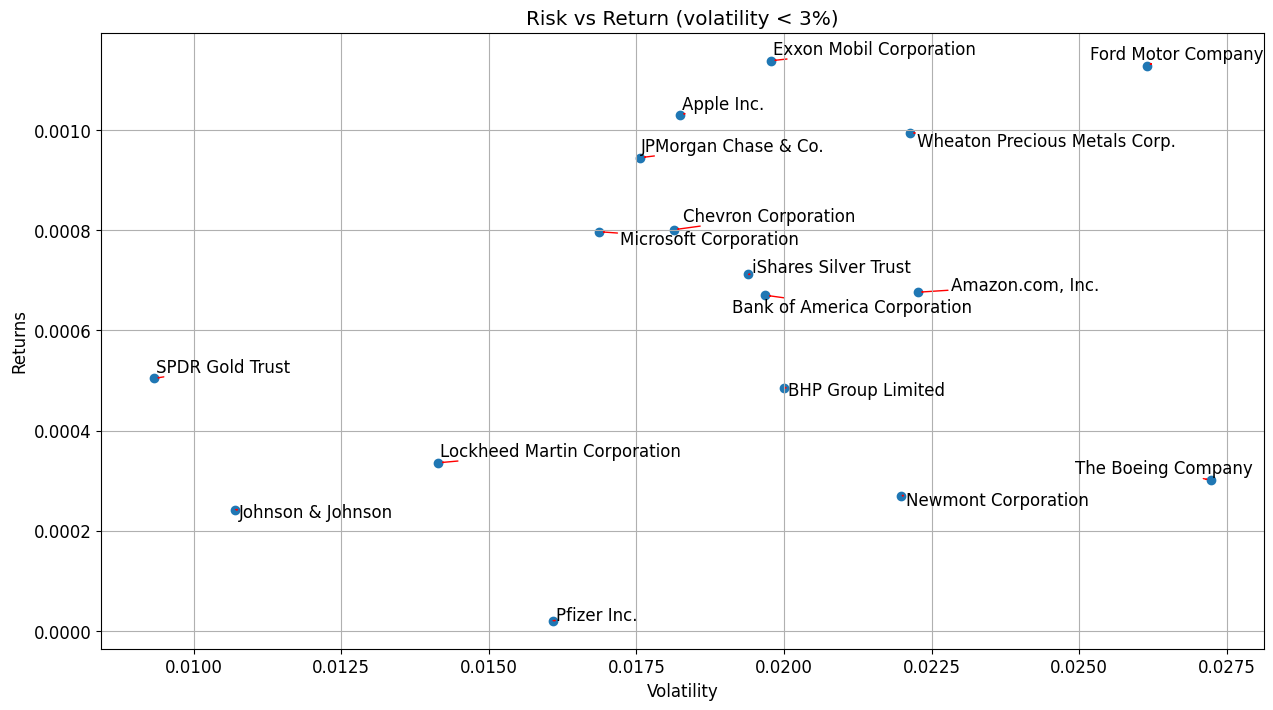

In [114]:
# Risk vs Return Plot
import matplotlib.pyplot as plt
from adjustText import adjust_text


# Traditional assets (volatility < 2.5%)
split_point = 0.03
mask = volatility < split_point
plt.figure(figsize=(15,8))
ax = plt.gca()
texts= []
plt.scatter(volatility[mask], mean_returns[mask])
for i, txt in enumerate(mean_returns.index[mask]):
    text = ax.annotate(txt, (volatility[mask].iloc[i], mean_returns[mask].iloc[i]), fontsize=12)
    texts.append(text)
# Adjust text labels to prevent overlap
adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle="->", color='r'), min_arrow_len=0, time_lim=1)
plt.title('Risk vs Return (volatility < 3%)')
plt.xlabel('Volatility')
plt.ylabel('Returns')


plt.grid(True)
plt.show()


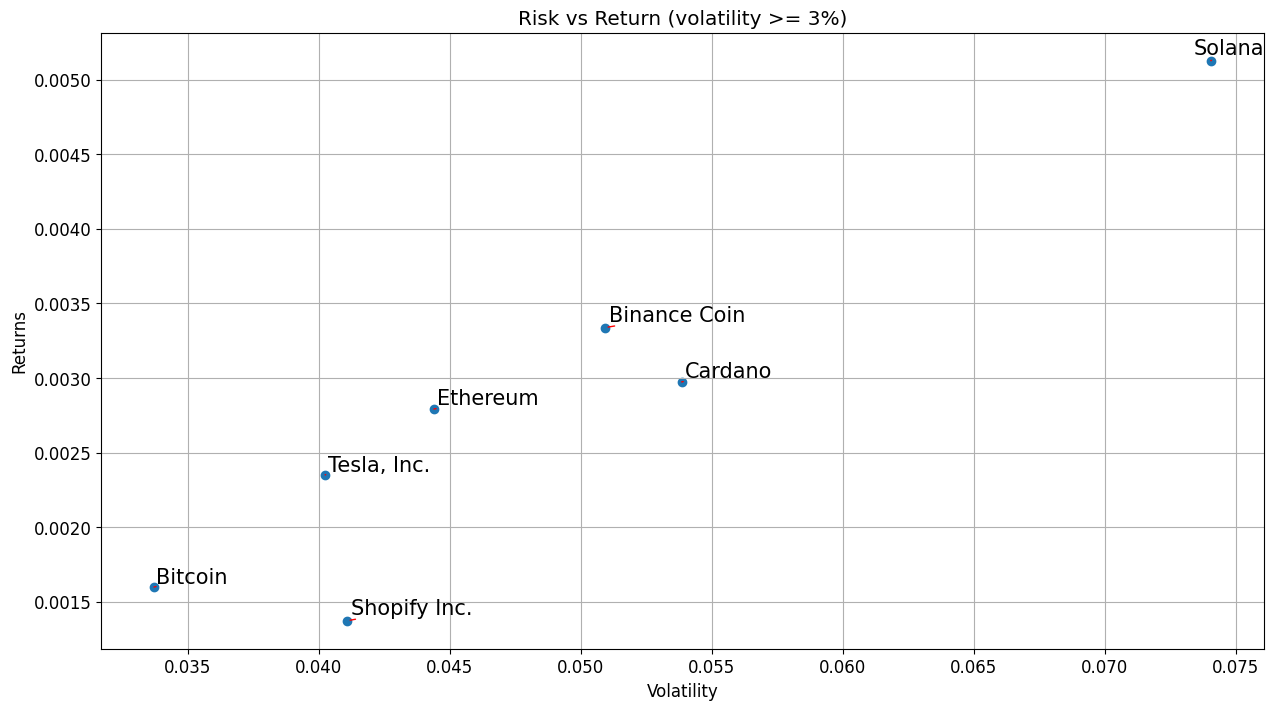

In [115]:

# Traditional assets (volatility >= 2.5%)
split_point = 0.03
mask = volatility >= split_point
plt.figure(figsize=(15,8))
ax = plt.gca()
texts= []
plt.scatter(volatility[mask], mean_returns[mask])
for i, txt in enumerate(mean_returns.index[mask]):
    text = ax.annotate(txt, (volatility[mask].iloc[i], mean_returns[mask].iloc[i]), fontsize=15)
    texts.append(text)
# Adjust text labels to prevent overlap
adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle="-", color='r'), min_arrow_len=0, time_lim=1)
plt.title('Risk vs Return (volatility >= 3%)')
plt.xlabel('Volatility')
plt.ylabel('Returns')


plt.grid(True)
plt.show()

# Risk vs Return:
When analyzing the risk (volatility) and return characteristics of the assets in our portfolio, several key trends emerge:

* **Low Volatility "Safe Plays":**
    * **Gold (SPDR Gold Trust - GLD)** and **healthcare stocks** (e.g., Johnson & Johnson - JNJ, Pfizer - PFE) exhibit the lowest volatility. These are typically considered stable investments with gradual movements rather than significant daily fluctuations.

* **Balanced Growth: Low Risk Tech Giants:**
    * Major **tech companies** like Microsoft (MSFT), Apple (AAPL), and Amazon (AMZN) demonstrate a favorable balance of decent returns coupled with relatively low risk. This makes them attractive for long-term investors seeking steady growth without excessive volatility.

* **High Risk, High Reward: Crypto Assets:**
    * **Cryptocurrencies** (Bitcoin - BTC-USD, Ethereum - ETH-USD, Solana - SOL-USD, Cardano - ADA-USD, Binance Coin - BNB-USD) stand out with the highest potential returns, but also come with exceptionally high volatility. Investing in this asset class can offer significant rewards but involves navigating substantial price swings.

* **Moderate Risk: Metals and Mining:**
    * **Metals and mining stocks** (e.g., Newmont - NEM, Wheaton Precious Metals - WPM, iShares Silver Trust - SLV) fall into a middle ground. They can provide some hedging against market instability but are not as inherently stable as gold.

* **Mid-to-High Volatility: Energy and Autos:**
    * **Energy companies** (Chevron - CVX, Exxon - XOM) and the **automotive sector** (Ford - F, Tesla - TSLA) tend to show mid-to-high volatility. This reflects their susceptibility to broader economic factors such as oil prices and supply chain disruptions.

